In [903]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Read the training dataset
    * Drop ID Column as it adds no value to our prediction

In [904]:
df = pd.read_csv("train.csv")
df.drop(columns=["Id"],inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [905]:
df.shape

(1460, 80)

In [906]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

* Categorical data (object data type) need to be replaced with numerical values 
* Check for missing values

In [907]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

* alot of features with missing values
  * PoolQC for Example has 1453 !! missing values  
  * any feature with more than 200 missing value will be dropped

In [908]:
df.drop(columns=df.columns[df.isnull().sum().values>200],inplace=True)
df.dropna(inplace=True)
df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

* Replace categorical data (strings) with numerical values

In [909]:
obj_to_replace = df["MSZoning"].dtype

for column in df.columns:
    if df[column].dtype == obj_to_replace:
        uniques = np.unique(df[column].values)
        for idx,item in enumerate(uniques):
            df[column] = df[column].replace(item,idx)
            
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


* z-score normalization

In [910]:
mean = df.mean()[0]
stddev = df.std()[0]
dfz = (df - df.mean())/df.std()
dfz.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.093666,-0.038304,-0.218282,0.061222,0.772604,0.308792,-0.027338,0.612259,-0.228217,-1.219291,...,-0.349481,-0.118643,-0.283097,-0.071744,-0.084504,-1.604719,0.146029,0.316322,0.184036,0.275468
1,-0.875970,-0.038304,-0.107027,0.061222,0.772604,0.308792,-0.027338,-0.614092,-0.228217,1.922172,...,-0.349481,-0.118643,-0.283097,-0.071744,-0.084504,-0.493376,-0.605460,0.316322,0.184036,-0.066678
2,0.093666,-0.038304,0.052600,0.061222,-1.341392,0.308792,-0.027338,0.612259,-0.228217,-1.219291,...,-0.349481,-0.118643,-0.283097,-0.071744,-0.084504,0.988414,0.146029,0.316322,0.184036,0.465548
3,0.336075,-0.038304,-0.111864,0.061222,-1.341392,0.308792,-0.027338,-1.840444,-0.228217,-1.053951,...,4.120970,-0.118643,-0.283097,-0.071744,-0.084504,-1.604719,-1.356949,0.316322,-3.589757,-0.592568
4,0.093666,-0.038304,0.343798,0.061222,-1.341392,0.308792,-0.027338,-0.614092,-0.228217,0.434111,...,-0.349481,-0.118643,-0.283097,-0.071744,-0.084504,2.099757,0.146029,0.316322,0.184036,0.801358


In [911]:
dfz = np.asarray(dfz)
df = np.asarray(df)

In [912]:
Y =df[:,-1:]
Y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [913]:
X = dfz[:,0:-1]
X

array([[ 0.0936663 , -0.03830389, -0.21828163, ...,  0.14602932,
         0.31632242,  0.18403587],
       [-0.87597011, -0.03830389, -0.1070267 , ..., -0.60546004,
         0.31632242,  0.18403587],
       [ 0.0936663 , -0.03830389,  0.05259993, ...,  0.14602932,
         0.31632242,  0.18403587],
       ...,
       [ 0.3360754 , -0.03830389, -0.16100953, ...,  1.64900804,
         0.31632242,  0.18403587],
       [-0.87597011, -0.03830389, -0.09570772, ...,  1.64900804,
         0.31632242,  0.18403587],
       [-0.87597011, -0.03830389, -0.07442417, ...,  0.14602932,
         0.31632242,  0.18403587]])

In [914]:
ones = np.ones ((len(X),1))
X = np.concatenate((ones,X),axis=1)
X

array([[ 1.        ,  0.0936663 , -0.03830389, ...,  0.14602932,
         0.31632242,  0.18403587],
       [ 1.        , -0.87597011, -0.03830389, ..., -0.60546004,
         0.31632242,  0.18403587],
       [ 1.        ,  0.0936663 , -0.03830389, ...,  0.14602932,
         0.31632242,  0.18403587],
       ...,
       [ 1.        ,  0.3360754 , -0.03830389, ...,  1.64900804,
         0.31632242,  0.18403587],
       [ 1.        , -0.87597011, -0.03830389, ...,  1.64900804,
         0.31632242,  0.18403587],
       [ 1.        , -0.87597011, -0.03830389, ...,  0.14602932,
         0.31632242,  0.18403587]])

In [915]:
split_ratio = 0.75
split = int(split_ratio * X.shape[0])
X_test = X[split+1:,:]
X_train = X[:split+1, :]
Y_test = Y[split+1:,:]
Y_train = Y[:split+1, :]

In [916]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1004, 74)
(334, 74)
(1004, 1)
(334, 1)


* Regularized normal equation

In [917]:
def normalEquation(X,Y,lam):
    lam_matrix = lam * np.identity(X.shape[1])
    lam_matrix[0][0] = 0
    W = np.linalg.inv(X.T.dot(X) + lam_matrix).dot(X.T).dot(Y)
    return W

In [918]:
def computeCost(X,y,W,lam):
    TotalCost = np.power(((X.dot(W.T))-y),2)+lam*np.sum(np.power(W,2))
    return np.sum(TotalCost)/(2 * len(X))

In [919]:
lam_range = 600
for lam in range(lam_range):
    W = normalEquation(X_train,Y_train,lam)
    Cost = computeCost(X_train,Y_train,W.T,lam)
    Y_pred = X_test.dot(W)

In [920]:
print('pred price =',Y_pred[100][0],'actual price =',Y_test[100][0])

pred price = 275340.7105588848 actual price = 271900.0


In [921]:
from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(Y_test, Y_pred)
print ('\nmean absolute error = ' + str(mean))


mean absolute error = 20165.408689914966


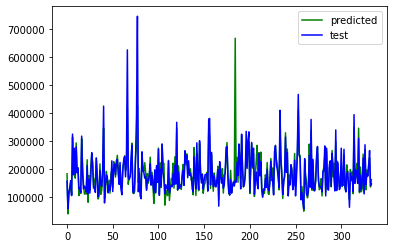

In [922]:
from cProfile import label
xplt = np.arange(0, 334)
Ypreplt = Y_pred.reshape(-1)
Ytestplt = Y_test.reshape(-1)
plt.plot(xplt, Ypreplt, color ="green",label="predicted")
plt.plot(xplt, Ytestplt, color ="blue",label="test")
plt.legend()
plt.show()

In [923]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train,Y_train)
ysklearn = model.predict(X_test)
mean_absolute_error(Y_test,ysklearn)

20415.214275063154